In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto
import scipy.stats as sts
# get_ipython().magic(u'matplotlib inline')

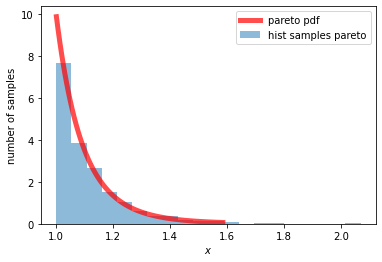

In [5]:
# Выбор параметров для распределения
k = 10
#Сгенерируйте из него выборку объёма 1000
sampleRange = pareto.rvs(k, size=1000)
#Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.
plt.hist(sampleRange,density=True, bins=20, alpha=0.5, label='hist samples pareto')
plt.ylabel('number of samples')
plt.xlabel('$x$')

#теоретическая плотность распределения случайной величины
left = pareto.ppf(0.01, k)
right =  pareto.ppf(0.99, k)
x = np.linspace(left,  right, 100)
plt.plot(x, pareto.pdf(x, k), 'r-', lw=5, alpha=0.7, label='pareto pdf')
plt.legend(loc='best')

In [6]:
# функция построения гистограммы распределений выборочных средних 
# и плотности соответствующего нормального распределения 
# sizeSamples - выбороки объёма n
def paretoF(sizeSamples, Ex, Dx):
    n = sizeSamples
    #генерация выборок
    values = np.array([ pareto.rvs(k, size=n) for x in range(1000)])
    #вычисление выборочных средних
    meanVal = values.mean(axis = 1)
    plt.hist(meanVal, density=True, alpha=0.5, label='hist mean n ' + str(n))
    
    #мат. ожидание м sigma нормального распределения
    mu = Ex
    sigma = math.sqrt(Dx/n)
    print( 'мат. ожидание=' , mu)
    print( 'sigma=' , sigma)
    # зададим нормальное распределенние
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0.5,2,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, 'r-', lw=3, alpha=0.7, label='pareto pdf n ' + str(n))
    plt.ylabel('samples')
    plt.xlabel('$x$')
    plt.legend(loc='best')
#Вычисление теоритических EX, std, DX  распределения
EX = pareto.mean(k)
std = pareto.std(k)
DX = std**2
print ('Ex=', EX, ' STD=', std, ' DX=', DX)

Ex= 1.1111111111111112  STD= 0.12422599874998831  DX= 0.015432098765432098


мат. ожидание= 1.1111111111111112
sigma= 0.05555555555555555


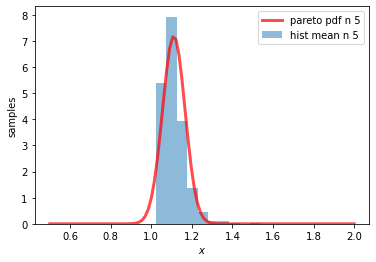

In [7]:
paretoF(5, EX, DX)

мат. ожидание= 1.1111111111111112
sigma= 0.039283710065919304


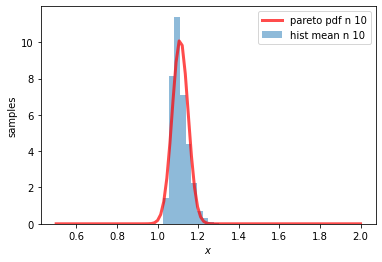

In [8]:
paretoF(10, EX, DX)

мат. ожидание= 1.1111111111111112
sigma= 0.017568209223157664


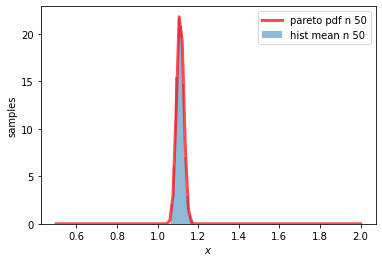

In [9]:
paretoF(50, EX, DX)

In [ ]:
#вывад
# Распределение выборочных средних для функции pareto хорошо описывается нормальным распределением
# С ростом n точность аппроксимации увеличивается